In [6]:
!pip install stopwords

  Running setup.py bdist_wheel for stopwords: started
  Running setup.py bdist_wheel for stopwords: finished with status 'done'
  Stored in directory: C:\Users\Java-AILab\AppData\Local\pip\Cache\wheels\39\fa\c7\c4c5111e658f5c58465d948165dc3395a3c10ff57f4cd20356
Successfully built stopwords


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [10]:
import nltk

In [11]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Java-
[nltk_data]     AILab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
current_path = os.getcwd()

In [3]:
print(current_path)

C:\Users\Java-AILab\OneDrive\Документы\Portfolio\Current\For work\LOVO\quora-question-pairs


In [4]:
train_fold = os.path.join(current_path, "train")

In [5]:
os.listdir(train_fold)

['train.csv']

In [6]:
fileis = os.path.join(train_fold, "train.csv")

In [7]:
fileis

'C:\\Users\\Java-AILab\\OneDrive\\Документы\\Portfolio\\Current\\For work\\LOVO\\quora-question-pairs\\train\\train.csv'

In [8]:
#data_frame = pd.read_csv(r'train\train.csv')

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fuzzywuzzy import fuzz
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

os.listdir(train_fold)
data_frame = pd.read_csv(r'train\train.csv')

def extract_features(df):
    df['fuzz_qratio'] = df.apply(lambda x: fuzz.QRatio(str(x['question1']), str(x['question2'])), axis=1)
    df['fuzz_partial_ratio'] = df.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)
    df['fuzz_partial_token_set_ratio'] = df.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
    df['fuzz_partial_token_sort_ratio'] = df.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)
    df['fuzz_token_set_ratio'] = df.apply(lambda x: fuzz.token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
    df['fuzz_token_sort_ratio'] = df.apply(lambda x: fuzz.token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)
    return df
df = extract_features(data_frame)
print (df)

feature_columns = df.columns.drop(['id','question1', 'question2', 'is_duplicate'])

X_normalized = normalize(df[feature_columns], norm='l2',axis=1, copy=True, return_norm=False)
print (X_normalized)
x_train, x_test, y_train, y_test = train_test_split(X_normalized, df['is_duplicate'], random_state = 1,test_size=0.2)

result_cols = ["Classifier", "Accuracy"]
result_frame = pd.DataFrame(columns=result_cols)

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()]


for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(x_train, y_train)
    predicted = clf.predict(x_test)
    acc = metrics.accuracy_score(y_test,predicted)
    print (name+' accuracy = '+str(acc*100)+'%')
    acc_field = pd.DataFrame([[name, acc*100]], columns=result_cols)
    result_frame = result_frame.append(acc_field)

    
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

# Any results you write to the current directory are saved as output.

C:\Users\Java-AILab\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


            id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
5            5      11      12   
6            6      13      14   
7            7      15      16   
8            8      17      18   
9            9      19      20   
10          10      21      22   
11          11      23      24   
12          12      25      26   
13          13      27      28   
14          14      29      30   
15          15      31      32   
16          16      33      34   
17          17      35      36   
18          18      37      38   
19          19      39      40   
20          20      41      42   
21          21      43      44   
22          22      45      46   
23          23      47      48   
24          24      49      50   
25          25      51      52   
26          26      53      54   
27          27      55      56   
28          28

KNeighborsClassifier accuracy = 71.6218555987039%
DecisionTreeClassifier accuracy = 70.84889559474634%


C:\Users\Java-AILab\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier accuracy = 74.11635212347572%
AdaBoostClassifier accuracy = 71.02327537163917%
GaussianNB accuracy = 63.740137030349494%


<Figure size 640x480 with 1 Axes>

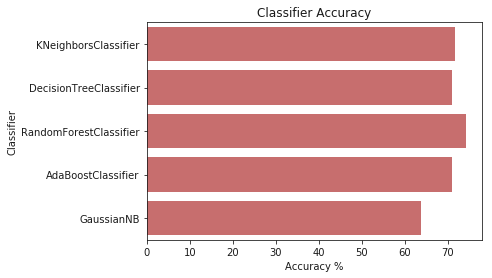

In [10]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=result_frame, color="r")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()